# Plotting Figure 3
> Shape optimization process for Rijke tube

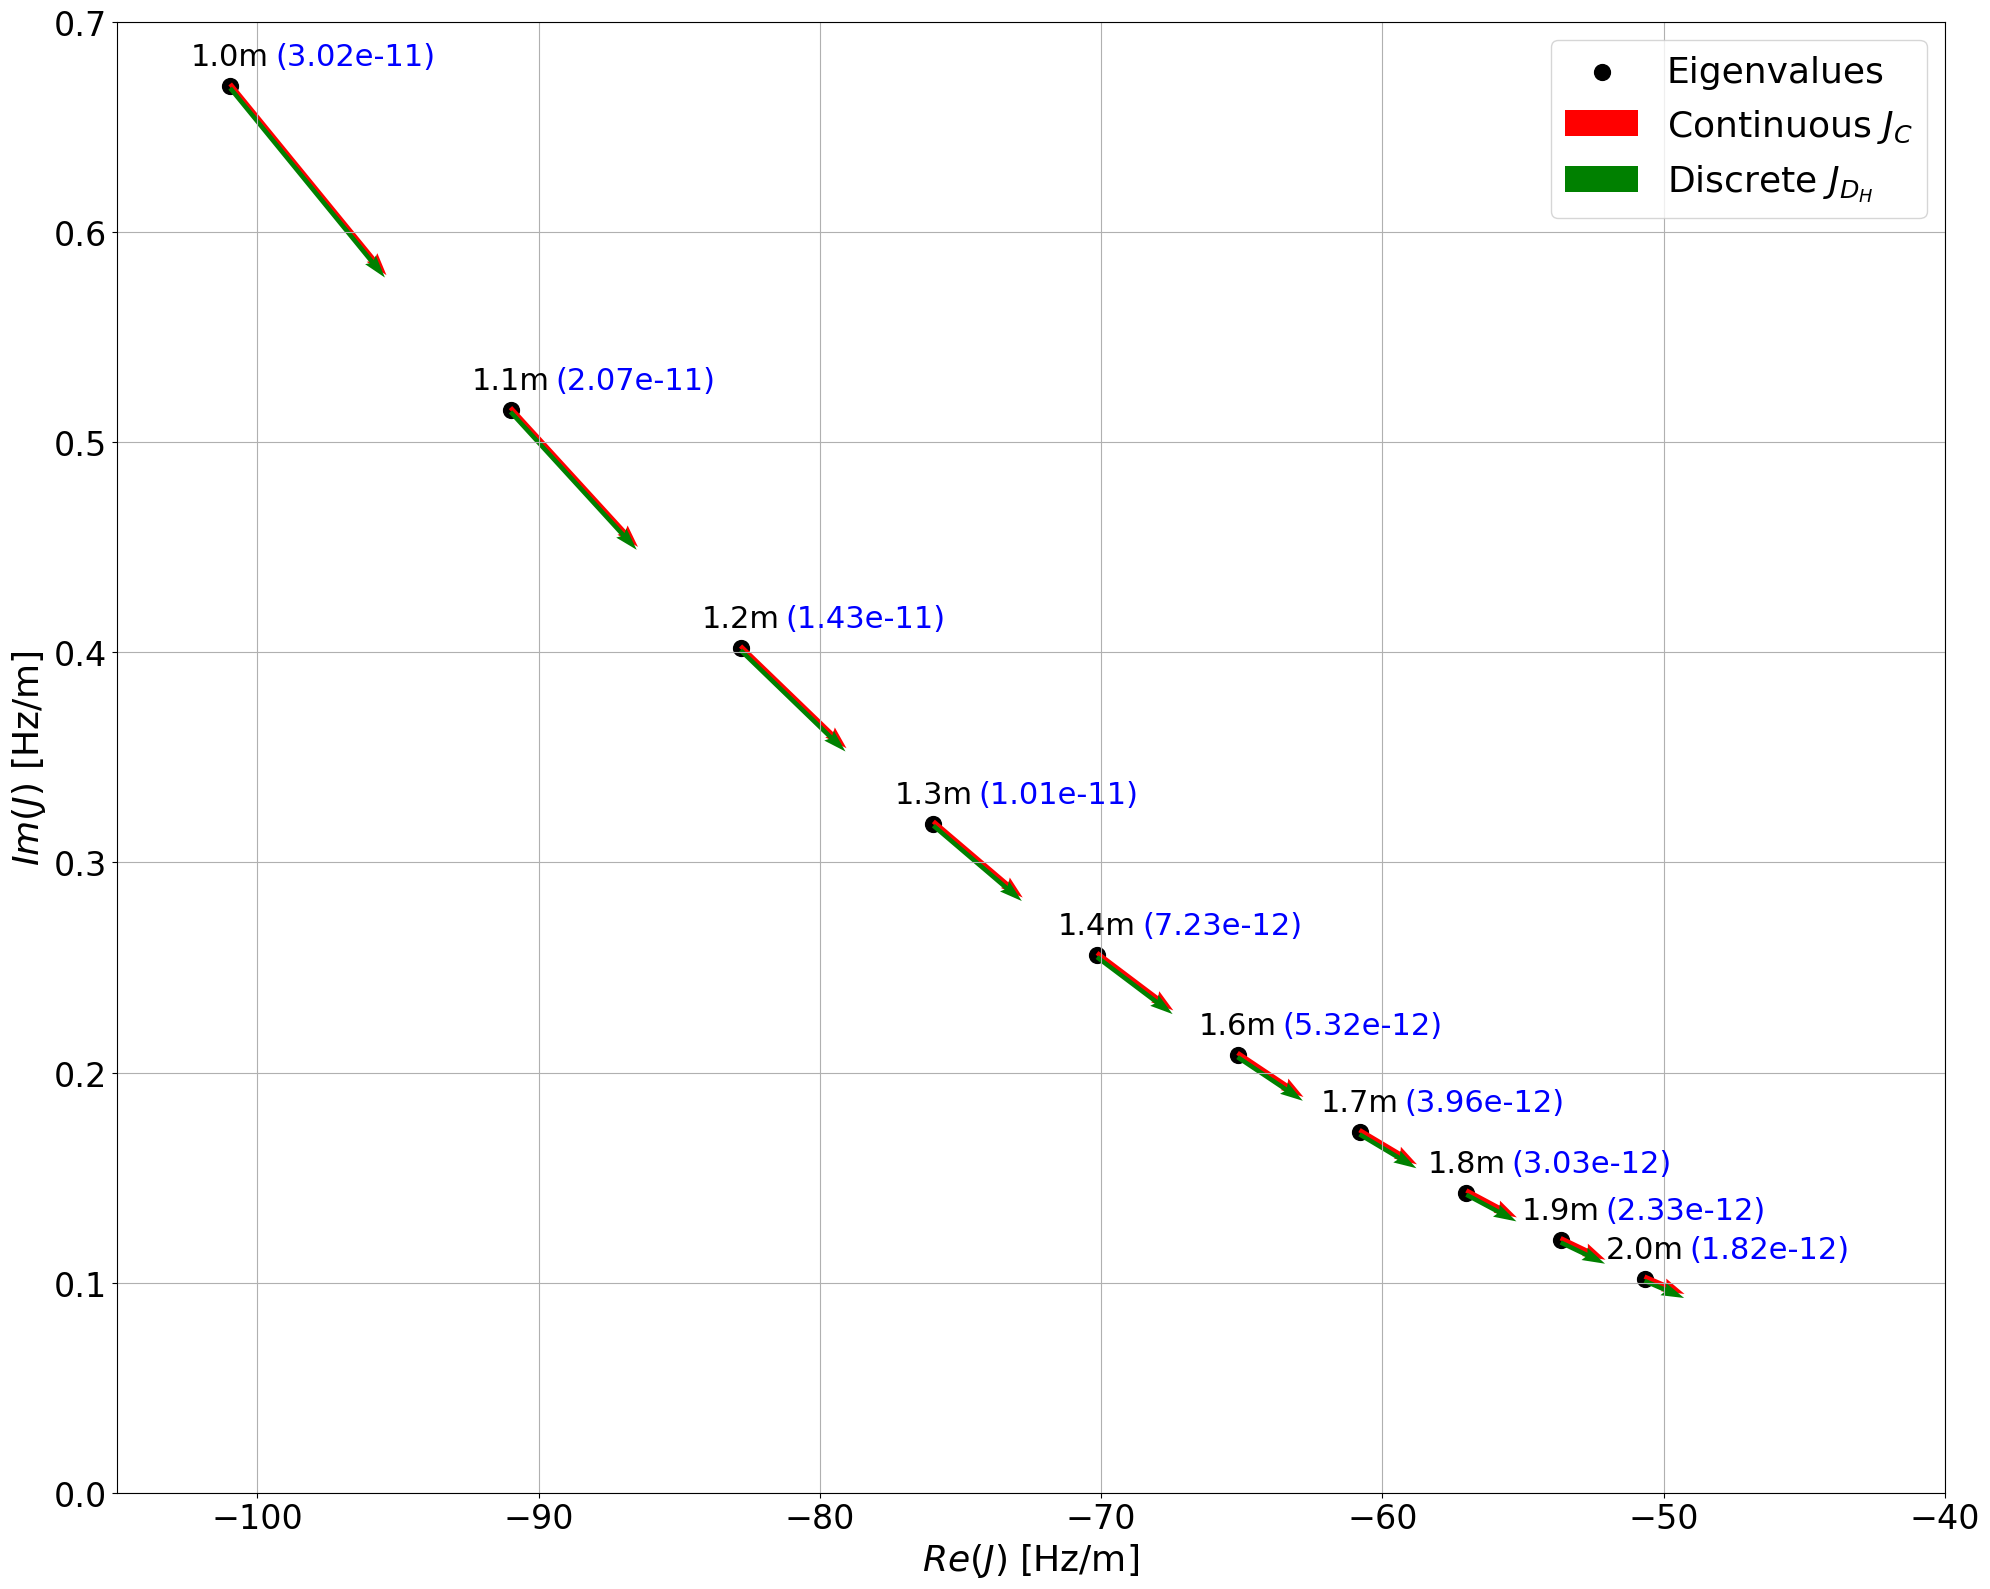

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig3.txt')

# read file
with open(file, 'r') as f:
    lines = f.readlines()

# create empty lists to store the data
duct = []
eigenvalues = []
continuous = []
discrete = []

# read the data from the file
for line in lines[1:]: # skip the first line
    duc, eig, con, dis = line.strip().split(',')
    duct.append(round(float(duc),1))
    eigenvalues.append(complex(eig))
    continuous.append(complex(con))
    discrete.append(complex(dis))

# transform the lists into numpy arrays to perform operations
duct = np.array(duct)
eigenvalues = np.array(eigenvalues)
continuous = np.array(continuous)
discrete = np.array(discrete)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 16))

# Plot eigenvalues on the complex plane
ax.scatter(eigenvalues.real, eigenvalues.imag, s=130 ,color='black', label='Eigenvalues')
# Add labels to each point
for i, txt in enumerate(duct):
    ax.annotate(f'{txt}m', (eigenvalues[i].real, eigenvalues[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(0,15), ha='center')
    # Compute the scalar product between the two vectors from continuous and discrete
    scalar_product = np.vdot(continuous[i], discrete[i])
    cos_theta = np.real(scalar_product) / (np.linalg.norm(continuous[i]) * np.linalg.norm(discrete[i]))
    error = 1-cos_theta
    #print(f"{error:.4e}")
    #print("Scalar product (continuous · discrete):", cos_theta)
    ax.annotate(f'({error:.2e})', (eigenvalues[i].real, eigenvalues[i].imag), fontsize=22,
                    textcoords="offset points", xytext=(90,15), ha='center', color='blue')


scale = 18
offset = 0.001
# Add arrows for continuous and discrete shape derivatives
for i in range(len(eigenvalues)):
    ax.quiver(eigenvalues[i].real, eigenvalues[i].imag+offset, continuous[i].real/scale, continuous[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='red', label='Continuous $J_C$' if i == 0 else "", width=0.0025)
    ax.quiver(eigenvalues[i].real, eigenvalues[i].imag-offset, discrete[i].real/scale, discrete[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='green', label='Discrete $J_{D_H}$' if i == 0 else "", width=0.0025)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, continuous[i].real/scale, continuous[i].imag/scale, head_width=0.01, head_length=1)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, discrete[i].real/scale, discrete[i].imag/scale, head_width=0.01, head_length=1)



# Set the fontsize of the tick labels
ax.tick_params(axis='both', which='major', labelsize=24)
# Set labels and title
ax.set_xlabel(r'$Re(J)$ [Hz/m]', fontsize=26)
ax.set_ylabel(r'$Im(J)$ [Hz/m]', fontsize=26)
ax.legend(fontsize=26)
ax.grid(True)

ax.set_ylim(0,0.7)
ax.set_xlim(-105, -40)

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to the 'Images/' folder
os.makedirs('Images/', exist_ok=True)
fig.savefig(os.path.join('Images/', 'Fig3.png'))
